Linear Regression Analysis

# LINEAR REGRESSION - CALIFORNIA HOUSING

In [1]:
# =======================================

# =======================================

# 1. Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# For better visualization
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (10,6)




In [2]:
# 2. Load dataset
housing = fetch_california_housing()
X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = housing.target

print("Dataset Shape:", X.shape)
print("Target Shape:", y.shape)
X.head()

Dataset Shape: (20640, 8)
Target Shape: (20640,)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


# Feature Scaling

In [4]:
scalar = StandardScaler()
x_train_scaled = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

In [5]:
scalar

,copy,True
,with_mean,True
,with_std,True


In [6]:
x_train_scaled

array([[-0.326196  ,  0.34849025, -0.17491646, ...,  0.05137609,
        -1.3728112 ,  1.27258656],
       [-0.03584338,  1.61811813, -0.40283542, ..., -0.11736222,
        -0.87669601,  0.70916212],
       [ 0.14470145, -1.95271028,  0.08821601, ..., -0.03227969,
        -0.46014647, -0.44760309],
       ...,
       [-0.49697313,  0.58654547, -0.60675918, ...,  0.02030568,
        -0.75500738,  0.59946887],
       [ 0.96545045, -1.07984112,  0.40217517, ...,  0.00707608,
         0.90651045, -1.18553953],
       [-0.68544764,  1.85617335, -0.85144571, ..., -0.08535429,
         0.99543676, -1.41489815]], shape=(16512, 8))

In [7]:
X_test

array([[-1.15508475, -0.28632369, -0.52068576, ...,  0.06740798,
         0.1951    ,  0.28534728],
       [-0.70865905,  0.11043502, -0.16581537, ..., -0.03602975,
        -0.23549054,  0.06097472],
       [-0.21040155,  1.85617335, -0.61076476, ..., -0.14998876,
         1.00947776, -1.42487026],
       ...,
       [ 2.80902421, -0.28632369,  0.75501156, ..., -0.02646898,
         0.78014149, -1.23041404],
       [-0.57542978,  0.58654547, -0.06124296, ..., -0.04390537,
         0.52740357, -0.08860699],
       [-0.17259111, -0.92113763, -0.6058703 , ...,  0.05466644,
        -0.66608108,  0.60445493]], shape=(4128, 8))

Model Training

In [8]:
lr = LinearRegression()
lr.fit(x_train_scaled,y_train)
print("Intercept",lr.intercept_)
print("Coefficient",lr.coef_)

Intercept 2.0719469373788777
Coefficient [ 0.85438303  0.12254624 -0.29441013  0.33925949 -0.00230772 -0.0408291
 -0.89692888 -0.86984178]


In [9]:
y_pred = lr.predict(X_test)


In [10]:
y_pred

array([0.71912284, 1.76401657, 2.70965883, ..., 4.46877017, 1.18751119,
       2.00940251], shape=(4128,))

In [11]:

mse = mean_squared_error(y_test,y_pred)
rmse= (np.sqrt(mse))
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print(f"Mean Squared Error     : {mse:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"Mean Absolute Error    : {mae:.4f}")
print(f"R² Score               : {r2:.4f}")

Mean Squared Error     : 0.5559
Root Mean Squared Error: 0.7456
Mean Absolute Error    : 0.5332
R² Score               : 0.5758


# Residual Analysis

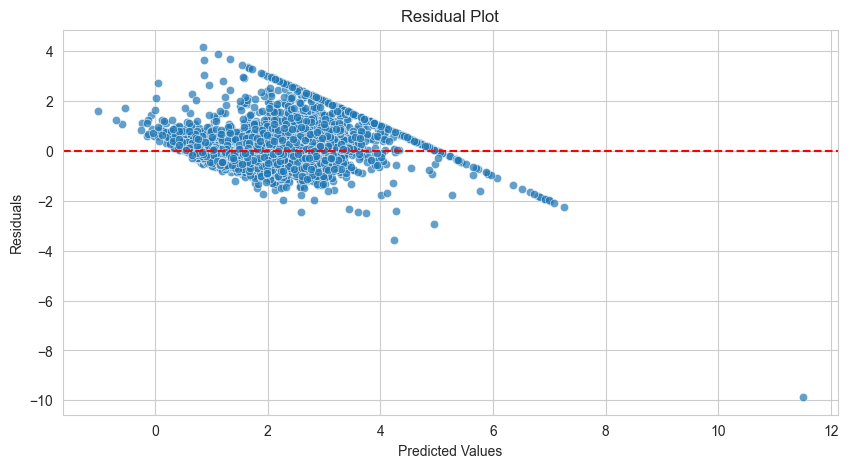

In [12]:
residuals = y_test - y_pred

plt.figure(figsize=(10,5))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


MedInc         1.646657
HouseAge       0.060331
AveRooms      20.697869
AveBedrms     31.316956
Population     4.935858
AveOccup      97.639561
Latitude       0.465953
Longitude     -0.297801
dtype: float64


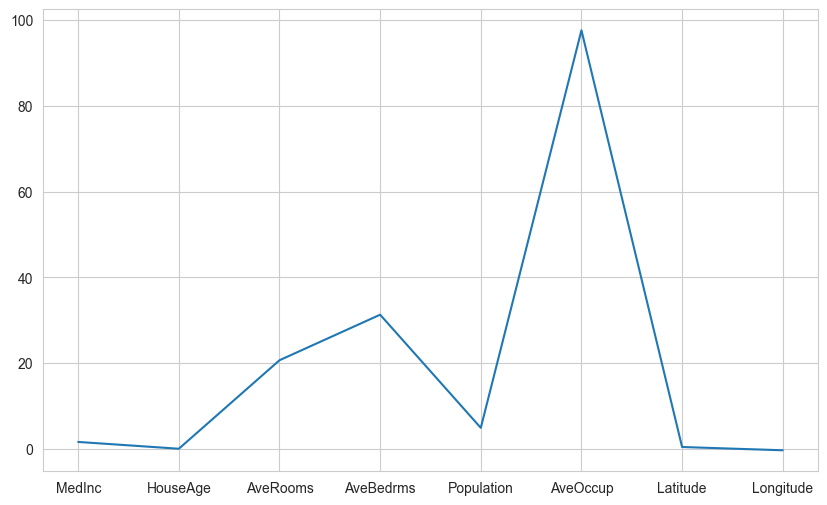

In [13]:
# Calculate skewness for all numerical features
skewness = X.skew(numeric_only=True)
print(skewness)
plt.plot(skewness)

#Cross Validation

In [19]:
# Try polynomial features to improve accuracy
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(x_train_scaled)
X_test_poly = poly.transform(X_test)

lr_poly = LinearRegression()
lr_poly.fit(X_train_poly, y_train)

y_poly_pred = lr_poly.predict(X_test_poly)

print("R² with Polynomial Features:", r2_score(y_test, y_poly_pred))


R² with Polynomial Features: 0.6456819729261862


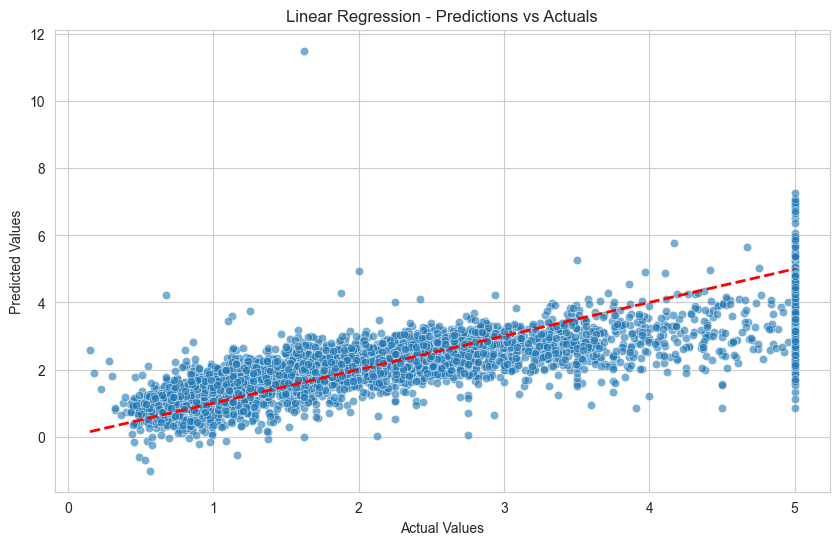

In [15]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()],[y_test.min(), y_test.max()],'r--', lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Linear Regression - Predictions vs Actuals")
plt.show()
